Building Dashboards

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#plt.rcParams['figure.figsize'] = 16, 16


In [3]:
os.getcwd()

'/Users/oscarsanchez/PYTHON/MLApprentice/pythonA-Z'

In [4]:
df = pd.read_csv(f"{os.getcwd()}//S6-Movie-Ratings.csv")

In [5]:
df.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [6]:
clean_column_labes = []
for label in df.columns:
  parts = label.split(' ')
  parts = [word for word in parts if word and word[0].isalpha()]
  parts = [word.capitalize() for word in parts]
  clean_label = "".join(parts)
  clean_column_labes.append(clean_label)
df.columns = clean_column_labes

In [7]:
df.head()

,Film,Genre,RottenTomatoesRatings,AudienceRatings,Budget,YearOfRelease
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Film                   559 non-null    object
 1   Genre                  559 non-null    object
 2   RottenTomatoesRatings  559 non-null    int64 
 3   AudienceRatings        559 non-null    int64 
 4   Budget                 559 non-null    int64 
 5   YearOfRelease          559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [9]:
df.Film = df.Film.astype('category')
df.Genre = df.Genre.astype('category')
df.YearOfRelease = df.YearOfRelease.astype('category')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Film                   559 non-null    category
 1   Genre                  559 non-null    category
 2   RottenTomatoesRatings  559 non-null    int64   
 3   AudienceRatings        559 non-null    int64   
 4   Budget                 559 non-null    int64   
 5   YearOfRelease          559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


In [11]:
df.describe()

,RottenTomatoesRatings,AudienceRatings,Budget
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


In [12]:
# function used to create stacked histograms; that is it returns a a list of Pandas Series
def get_budgets_by_category(dataframe: pd.DataFrame, col_cat='Genre', target = 'Budget'):
  results = []
  for cat in dataframe[col_cat].cat.categories:
    results.append(dataframe[dataframe[col_cat] == cat][target])
  return results

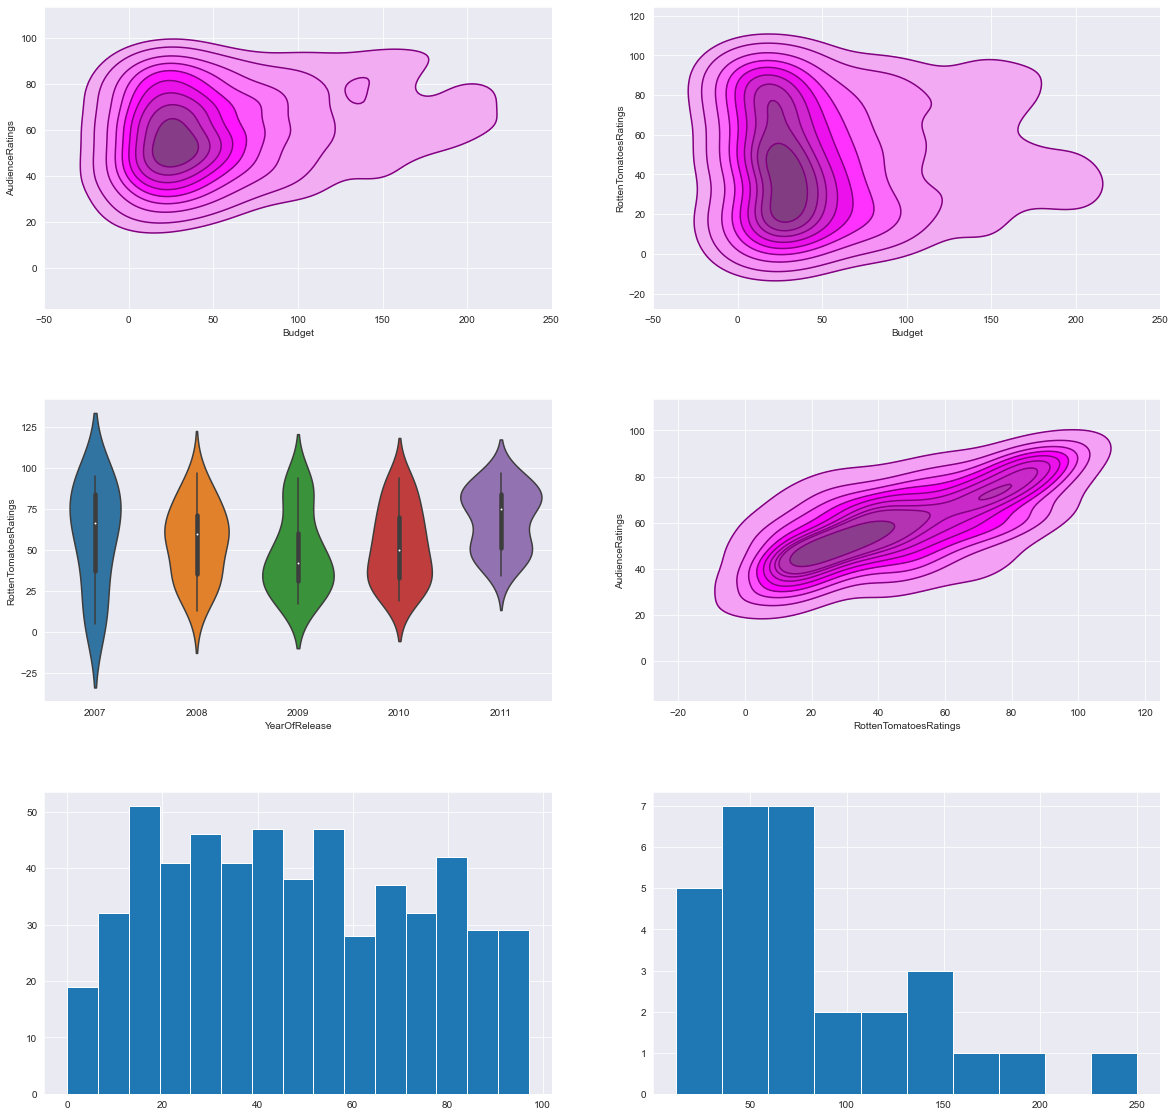

In [13]:
sns.set_style('darkgrid')
fg, axes = plt.subplots(3,2)
fg.figure.subplots_adjust(hspace=0.3, wspace=0.2)
fg.set_size_inches(20, 20)

k1 = sns.kdeplot(df['Budget'], df['AudienceRatings'], shade=True, color='Purple', \
  ax=axes[0, 0])
k1b = sns.kdeplot(df['Budget'], df['AudienceRatings'], color='Purple', \
  ax=axes[0, 0])
k2 = sns.kdeplot(df['Budget'], df['RottenTomatoesRatings'], shade=True, color='Purple', \
  ax=axes[0, 1])
k2b = sns.kdeplot(df['Budget'], df['RottenTomatoesRatings'], color='Purple', \
  ax=axes[0, 1])
k1.set_xlim(-50, 250)
k2.set_xlim(-50, 250)
vio1 = sns.violinplot(data=df[df.Genre == 'Drama'], x='YearOfRelease', y='RottenTomatoesRatings', \
  ax=axes[1,0])
k3 = sns.kdeplot(df['RottenTomatoesRatings'], df['AudienceRatings'], shade=True, color='Purple', \
  ax=axes[1,1])
k3b = sns.kdeplot(df['RottenTomatoesRatings'], df['AudienceRatings'], color='Purple', \
  ax=axes[1,1])
axes[2,0].hist(df.RottenTomatoesRatings, bins=15)
axes[2,1].hist(get_budgets_by_category(df)[1], stacked=True )
plt.show()


Styling Dashboards

In [14]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = 20, 20


In [15]:
# get data from working directory to create pandas Dataframe
df = pd.read_csv(f"{os.getcwd()}/S6-Movie-Ratings.csv")

In [16]:
# Change column names to use dot notation
clean_column_labes = []
for label in df.columns:
  parts = label.split(' ')
  parts = [word for word in parts if word and word[0].isalpha()]
  parts = [word.capitalize() for word in parts]
  clean_label = "".join(parts)
  clean_column_labes.append(clean_label)
df.columns = clean_column_labes

In [17]:
# these columns must be of type category inorder for the funtion below to work
df.Film = df.Film.astype('category')
df.Genre = df.Genre.astype('category')
df.YearOfRelease = df.YearOfRelease.astype('category')

In [18]:
# function used to create stacked histograms; that is it returns a a list of Pandas Series
def get_budgets_by_category(dataframe: pd.DataFrame, col_cat='Genre', target = 'Budget'):
  results = []
  genre_labels = []
  for cat in dataframe[col_cat].cat.categories:
    results.append(dataframe[dataframe[col_cat] == cat][target])
    genre_labels.append(cat)
  return (genre_labels,results)

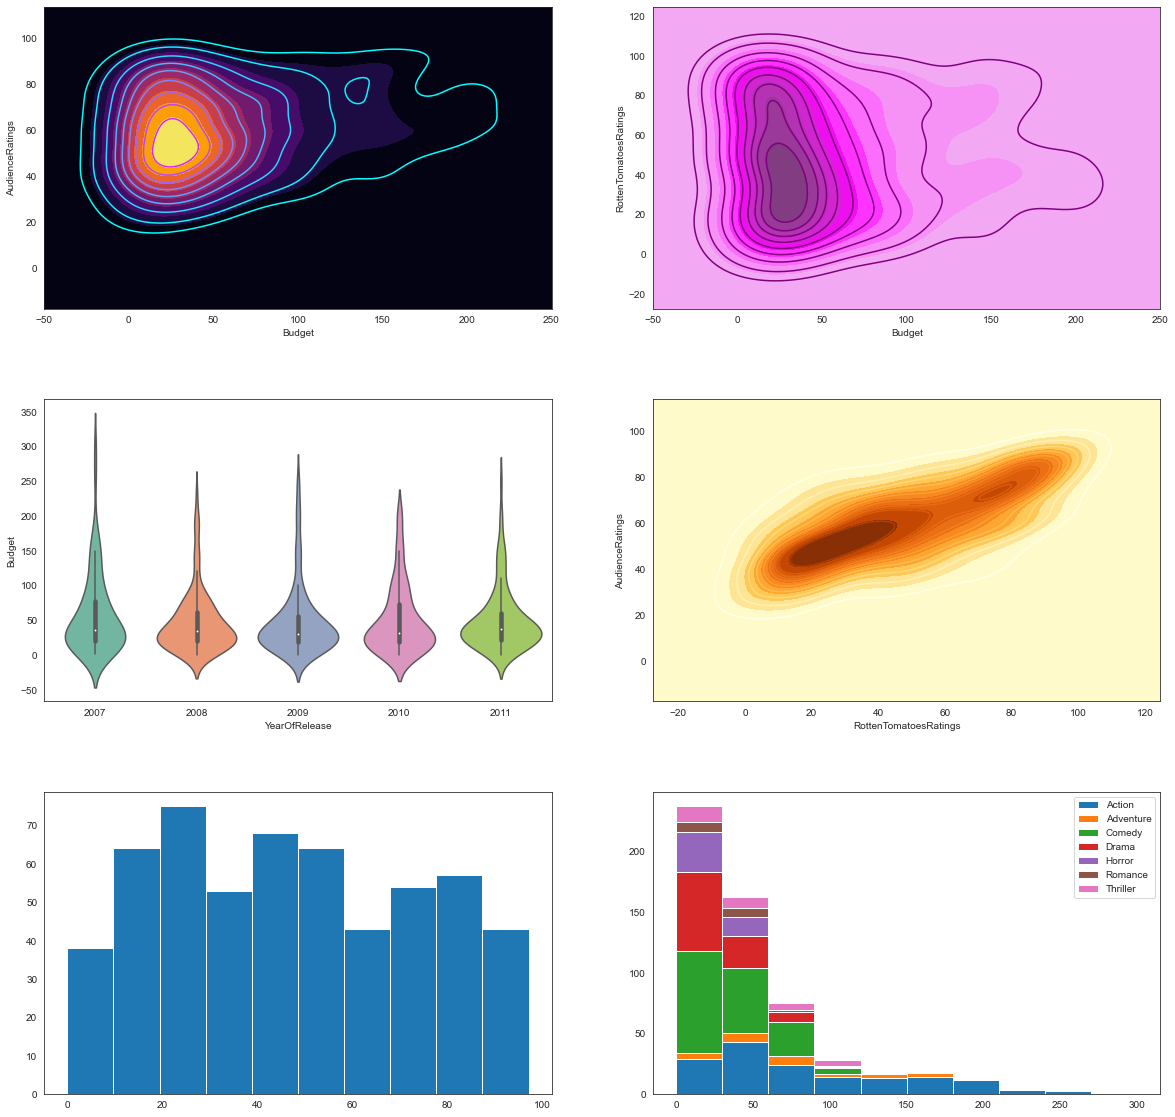

In [19]:
#sns.set_style('dark', {"axes.facecolor": "black"})
sns.set_style('white')
fg, axes = plt.subplots(3,2)
fg.figure.subplots_adjust(hspace=0.3, wspace=0.2)
fg.set_size_inches(20, 20)

# plots
k1 = sns.kdeplot(df.Budget, df.AudienceRatings, shade=True, shade_lowest=True ,cmap='inferno',\
  ax=axes[0, 0])
k1b = sns.kdeplot(df.Budget, df.AudienceRatings, cmap='cool', \
  ax=axes[0, 0])

k2 = sns.kdeplot(df.Budget, df.RottenTomatoesRatings, shade=True, shade_lowest=True, color='Purple', \
  ax=axes[0, 1])
k2b = sns.kdeplot(df.Budget, df.RottenTomatoesRatings, color='Purple', \
  ax=axes[0, 1])
k1.set_xlim(-50, 250)
k2.set_xlim(-50, 250)
vio1 = sns.violinplot(data=df, x='YearOfRelease', y='Budget', palette='Set2', \
  ax=axes[1,0])
k3 = sns.kdeplot(df.RottenTomatoesRatings, df.AudienceRatings, shade=True, cmap="YlOrBr", shade_lowest=True,\
  ax=axes[1,1])
k3b = sns.kdeplot(df.RottenTomatoesRatings, df.AudienceRatings, cmap="YlOrBr", \
  ax=axes[1,1])
axes[2,0].hist(df.RottenTomatoesRatings)
stacked = get_budgets_by_category(df)
axes[2,1].hist(stacked[1], stacked=True, label=stacked[0] )
axes[2,1].legend()

plt.show()

In [20]:
df.Genre.isnull().sum()

0

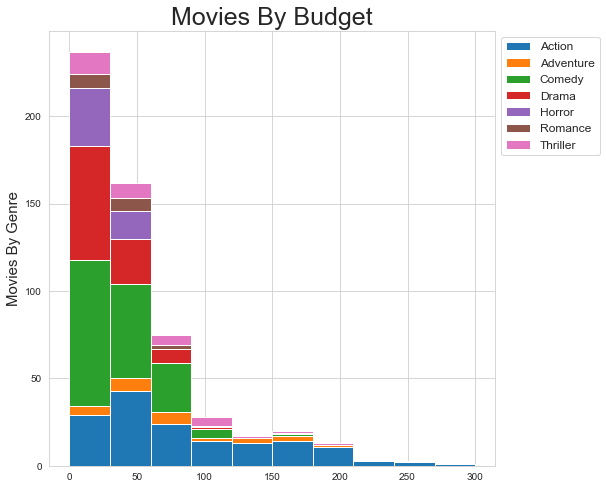

In [21]:
sns.set_style('whitegrid')
fig, axes = plt.subplots()
fig.set_size_inches(8, 8)
stacked = get_budgets_by_category(df)
axes.hist(stacked[1], stacked=True, label=stacked[0])
axes.legend(prop={'size': 12}, loc='upper left', bbox_to_anchor=(1,1))
plt.title('Movies By Budget', fontsize=25)
plt.ylabel('Movies By Genre', fontsize=15)
plt.show()

In [22]:
one = df.Budget.unique()
print(one)


[  8 105  20  18 200  30  32  28  35   7  19  45  10  40  15 100   5  78
 237  21  70  17  80   4 150  13  61  68  33  26  42   2  55  37 140  85
   6  38 125  25  90  60 163  50  58  69  75 175  31 130  24   1  73  52
 110   0  53 112  16  36  12 250  83  11 160 185 186  79  47 117  27  22
  66 145  56   3  95 300 230  48  93  39 120 258  65  82  29  51  41 155
  14 180 138  62  59   9 195 210 170]


In [23]:
import numpy as np

In [24]:
one = np.sort(one)

In [25]:
print(one)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  24  25  26  27  28  29  30  31  32  33  35  36  37
  38  39  40  41  42  45  47  48  50  51  52  53  55  56  58  59  60  61
  62  65  66  68  69  70  73  75  78  79  80  82  83  85  90  93  95 100
 105 110 112 117 120 125 130 138 140 145 150 155 160 163 170 175 180 185
 186 195 200 210 230 237 250 258 300]
